<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#part-A" data-toc-modified-id="part-A-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>part A</a></span></li><li><span><a href="#part-D" data-toc-modified-id="part-D-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>part D</a></span></li><li><span><a href="#comparison" data-toc-modified-id="comparison-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>comparison</a></span></li></ul></div>

Manually extracting the minimum S11 value of all F33D files, i.e. power and bias current sweep. As can be seen from ll.318-328 in the measurement python script, the set resonance frequency was the one from the measurement in F33A, so we will also extract that one. We nonetheless extract the minimum values from F33D to check if there was a cavity there at all.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
import stlabutils

# part A

Bias current dependent S11 measurements. For increasing bias current the resonance shifts downwards due to the increased Josephson inductance.

In [6]:
myfileA = glob.glob('data_raw/F32_megameasurement3/F33A_2019_05_10_22.57.31_VNA_vs_Is_0to10uA_200mVpp/*.dat')[0]
mydataA = stlabutils.utils.readdata.readdat(myfileA)

['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']


In [8]:
mydataA[0].head()

,Frequency (Hz),S21re (),S21im (),S21dB (dB),S21Ph (rad),Power (dBm),Is (A),T (K)
0,7.337900e+09,0.002413,-0.001960,-50.148174,-0.682330,0.0,0.0,0.013848
1,7.337960e+09,0.002439,-0.002115,-49.819901,-0.714281,0.0,0.0,0.013848
2,7.338020e+09,0.002373,-0.002203,-49.795635,-0.748221,0.0,0.0,0.013848
3,7.338080e+09,0.002227,-0.002309,-49.875099,-0.803371,0.0,0.0,0.013848
4,7.338140e+09,0.002036,-0.002295,-50.263167,-0.844966,0.0,0.0,0.013848


In [80]:
IsetA, F0A = [], []
for datavna in mydataA[:-1]: # F33E got aborted earlier
    # copied from measurement script
    z = datavna['S21dB (dB)'].values
    x = datavna['Frequency (Hz)'].values
    fnew = x[np.argmin(z)]
    f0 = fnew
    i = datavna['Is (A)'].values[0]
    IsetA.append(i)
    F0A.append(f0)

IsetA, F0A = np.array(IsetA), np.array(F0A)

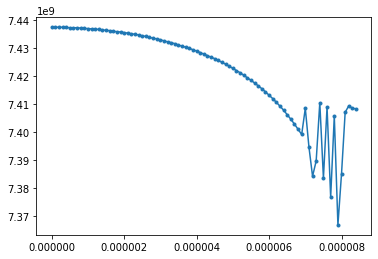

In [106]:
plt.plot(IsetA,F0A,'.-')
F0Eset = F0A

# part D

Bias current and VNA power dependent S11 measurements. For increasing bias current the resonance shifts downwards due to the increased Josephson inductance. For increasing VNA power the resonance shifts downwards due to the Kerr nonlinearity.

In [23]:
myfilesD = sorted(glob.glob('data_raw/F32_megameasurement3/F33D*/F33D*.dat'))

In [33]:
IsetD = []
PwrD = []
F0D = []
for myfileD in myfilesD:
    mydataD = stlabutils.utils.readdata.readdat(myfileD)
    for datavna in mydataD:
        # copied from measurement script
        z = datavna['S21dB (dB)'].values
        x = datavna['Frequency (Hz)'].values
        fnew = x[np.argmin(z)]
        f0 = fnew
        i = datavna['Is (A)'].values[0]
        p = datavna['Power (dBm)'].values[0]
        IsetD.append(i)
        F0D.append(f0)
        PwrD.append(p)

IsetD, PwrD, F0D = np.array(IsetD), np.array(PwrD), np.array(F0D)
IsetD = IsetD.reshape(len(myfilesD),len(IsetD)//len(myfilesD))
PwrD = PwrD.reshape(len(myfilesD),len(PwrD)//len(myfilesD))
F0D = F0D.reshape(len(myfilesD),len(F0D)//len(myfilesD))

['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S2

['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'Is (A)', 'T (K)']


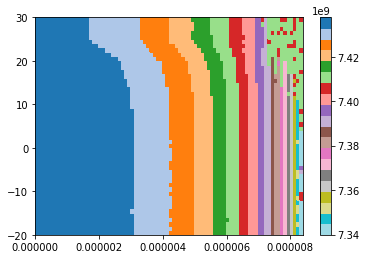

In [131]:
# plt.pcolormesh(IsetD,PwrD,(F0D.T-F0D[:,-1]).T,cmap='flag')
plt.pcolormesh(IsetD,PwrD,F0D,cmap='tab20_r')
plt.colorbar()
# plt.contour(IsetD,PwrD,F0D,colors='k')

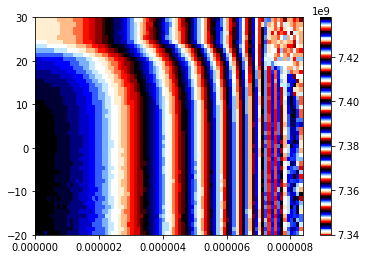

In [138]:
# plt.pcolormesh(IsetD,PwrD,(F0D.T-F0D[:,-1]).T,cmap='flag')
plt.pcolormesh(IsetD,PwrD,F0D,cmap='flag')
plt.colorbar()
# plt.contour(IsetD,PwrD,F0D,colors='k')

In [104]:
i = 20 # index corresponding to zero power
PwrD[:,i]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

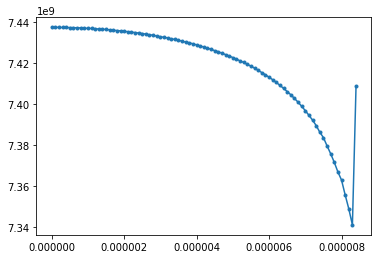

In [108]:
plt.plot(IsetD[:,i],F0D[:,i],'.-')
F0D0 = F0D[:,i]

# comparison

Text(0, 0.5, 'min(S11) (Hz)')

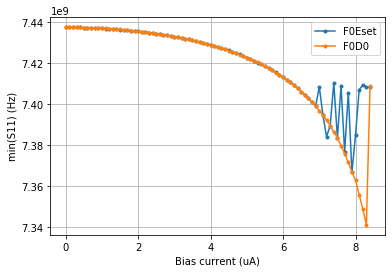

In [124]:
plt.plot(IsetA/1e-6,F0Eset,'.-',label='F0Eset')
plt.plot(IsetD[:,0]/1e-6,F0D0,'.-',label='F0D0')
plt.legend()
plt.grid()
plt.xlabel("Bias current (uA)")
plt.ylabel("min(S11) (Hz)")

The streaks for the mixing measurements at high bias currents are due to the above deviations: The drive (F0Eset) was set to an incorrect frequency for these bias currents.

Text(0, 0.5, 'Detuning (kHz)')

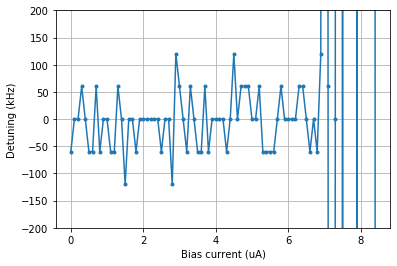

In [109]:
plt.plot(IsetA/1e-6,(F0A-F0D0)/1e3,'.-')
plt.ylim(-200,200)
plt.grid()
plt.xlabel("Bias current (uA)")
plt.ylabel("Detuning (kHz)")

Even for lower bias currents, there are deviations between drive frequency and actual minimum. However, these flucutations are below 150kHz, which is a factor 5 smaller than the total cavity linewidth (750kHz). Thus, this effect should be negligible.

Text(0, 0.5, 'VNA output power (dBm)')

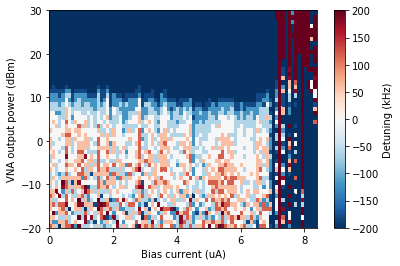

In [137]:
Z = (F0D.T-F0A).T/1e3
plt.pcolormesh(IsetD/1e-6,PwrD,Z,cmap='RdBu_r',vmin=-200,vmax=200)
plt.colorbar(label="Detuning (kHz)")
plt.xlabel("Bias current (uA)")
plt.ylabel("VNA output power (dBm)")

Text(0, 0.5, 'VNA output power (dBm)')

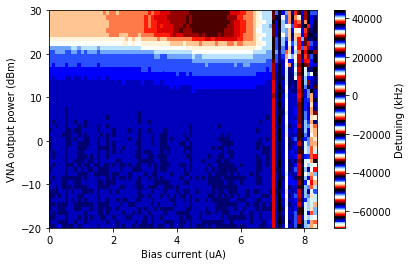

In [140]:
Z = (F0D.T-F0A).T/1e3
plt.pcolormesh(IsetD/1e-6,PwrD,Z,cmap='flag')
plt.colorbar(label="Detuning (kHz)")
plt.xlabel("Bias current (uA)")
plt.ylabel("VNA output power (dBm)")

Text(0, 0.5, 'VNA output power (dBm)')

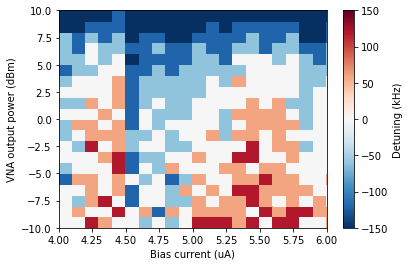

In [154]:
plt.pcolormesh(IsetD/1e-6,PwrD,Z,cmap='RdBu_r',vmin=-150,vmax=150)
plt.xlim(4,6)
plt.ylim(-10,10)
plt.colorbar(label="Detuning (kHz)")
plt.xlabel("Bias current (uA)")
plt.ylabel("VNA output power (dBm)")

No obvious deviations are visible even when zooming in closer to various areas. We have to conclude that the outliers in between must be due to random measurement errors or current fluctuations?
Note that sometimes the AWG would not turn on even after triggering. That could explain some of the weird outliers.